# Non-Linear Classification

Non-linear classification is used when the relationship between input features and output classes is not a straight line (linear). In such cases, linear models like logistic regression or linear SVM fail to separate the data effectively.

Non-linear classifiers can model complex decision boundaries (curves, circles, or irregular shapes) by capturing interactions and non-linear patterns in the data.

Examples of non-linear classification algorithms include:

1. K-Nearest Neighbors (KNN)

2. Naives Bayes Classifier

3. Random Forests

4. Decision Tree Classifier

### K-Nearest Neighbors (KNN)

KNN is a simple, instance-based non-linear classification algorithm. It classifies a new data point based on the majority class of its nearest neighbors in the feature space.

**How it works:**

* Choose a value of K (number of neighbors).

* Calculate the distance (e.g., Euclidean distance) between the new point and all training points.

* Select the K closest neighbors.

* Assign the new point to the most frequent class among those neighbors.

**Key characteristics:**

* Non-parametric → No assumptions about the data distribution.

* Lazy learner → No training phase; computation happens during prediction.

* Works well with small to medium datasets but can be slow with very large datasets.

**Advantages:**

* Simple and intuitive.

* Can model non-linear decision boundaries effectively.

**Disadvantages:**

* Sensitive to irrelevant features and scaling.

* Performance decreases with high-dimensional data (curse of dimensionality).

**Why use featurePlot():**

*Class separation check*

1. It helps you see if features can separate classes visually.

*Example:* In the iris dataset, Petal.Length and Petal.Width clearly separate species, while Sepal.Length overlaps more.

2. Supports different types of plots

* "pairs" → scatterplot matrix (shows relationships between features).

* "ellipse" → adds decision boundaries.

* "density" → shows class-wise feature distributions.

*Model insight*

* For Naive Bayes, distributions are key (since NB assumes features are conditionally independent and usually Gaussian).

* For KNN, scatterplots show where neighbors overlap.

* Fast sanity check before/after modeling

* You can visually confirm which features matter most.

In [9]:
# Install caret if not already installed
install.packages("caret")
install.packages("e1071")


library(caret)
library(e1071)

# Load dataset
data(iris)

# Split data into training (70%) and testing (30%)
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
trainData <- iris[trainIndex, ]
testData  <- iris[-trainIndex, ]

# Define training control
train_control <- trainControl(method = "cv", number = 10)

# Train KNN model
set.seed(123)
knn_model <- train(Species ~ ., 
                   data = trainData,
                   method = "knn",
                   trControl = train_control,
                   preProcess = c("center", "scale"),  # important for KNN
                   tuneLength = 10)  # searches for best k

# Print model details
print(knn_model)

# Make predictions
predictions <- predict(knn_model, newdata = testData)

# Confusion matrix
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)


Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"package 'e1071' is in use and will not be installed"


k-Nearest Neighbors 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 94, 94, 94, 94, 93, 96, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9525253  0.9283333
   7  0.9636364  0.9450000
   9  0.9636364  0.9450000
  11  0.9636364  0.9450000
  13  0.9545455  0.9312500
  15  0.9545455  0.9312500
  17  0.9545455  0.9312500
  19  0.9545455  0.9312500
  21  0.9545455  0.9312500
  23  0.9343434  0.9006593

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        13

Overall Statistics
                                          
               Accurac

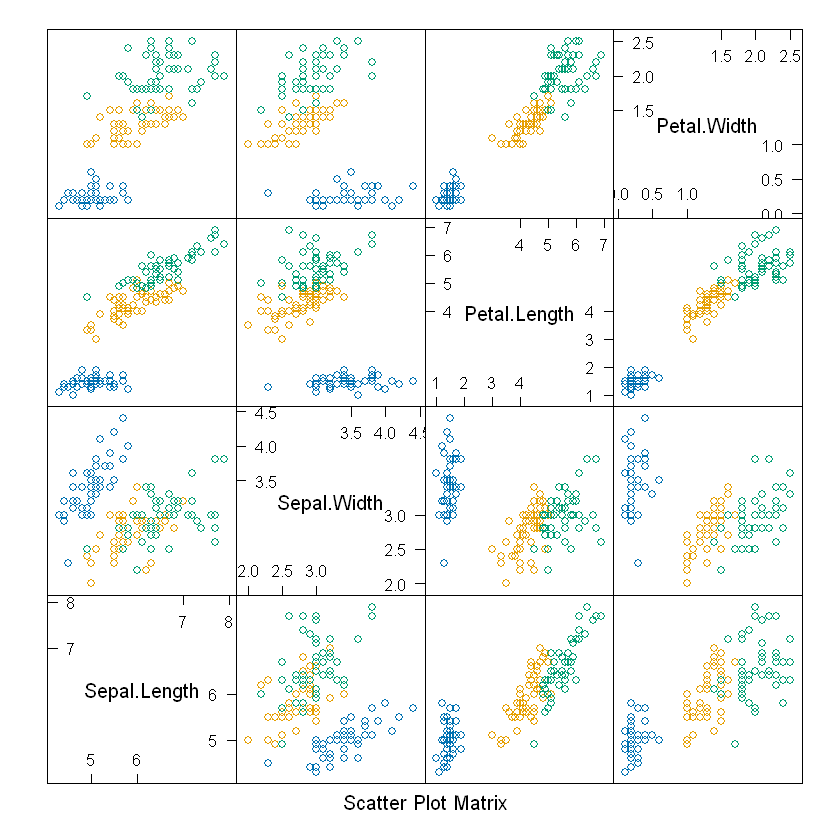

In [17]:
# Pairwise plots of features by Species
featurePlot(x = iris[, 1:4],
            y = iris$Species,
            plot = "pairs")



### Naive Bayes Classifier 

Naive Bayes is a probabilistic classifier based on Bayes’ theorem.

It assumes that all features are independent given the class (the “naive” assumption).

Despite this simplification, it works surprisingly well, especially for text classification (spam filtering, sentiment analysis).

It predicts the class with the highest posterior probability.

In [8]:
# Install packages if not already installed
# install.packages("caret")
 install.packages("klaR")   # caret uses this for Naive Bayes

library(caret)
library(klaR)

# Load dataset
data(iris)

# Split data (70% train, 30% test)
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
trainData <- iris[trainIndex, ]
testData  <- iris[-trainIndex, ]

# Train Naive Bayes model
nb_model <- train(Species ~ ., 
                  data = trainData, 
                  method = "nb", 
                  trControl = trainControl(method = "cv", number = 10))

# Print model details
print(nb_model)

# Make predictions
predictions <- predict(nb_model, newdata = testData)

# Confusion matrix
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)


also installing the dependencies 'bit', 'prettyunits', 'bit64', 'progress', 'rappdirs', 'clipr', 'vroom', 'jquerylib', 'memoise', 'sass', 'forcats', 'hms', 'readr', 'httpuv', 'mime', 'fontawesome', 'sourcetools', 'later', 'promises', 'bslib', 'cachem', 'haven', 'shiny', 'miniUI', 'rstudioapi', 'classInt', 'labelled', 'combinat', 'questionr'




package 'bit' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'jquerylib' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'httpuv' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'fontawesome' successfully unpacked and MD5 sums checked
package 'sourcetools' successfully 

Loading required package: MASS



Naive Bayes 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 95, 93, 95, 95, 93, 96, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.9716667  0.9571900
   TRUE      0.9716667  0.9580882

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         2
  virginica       0          2        13

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No In

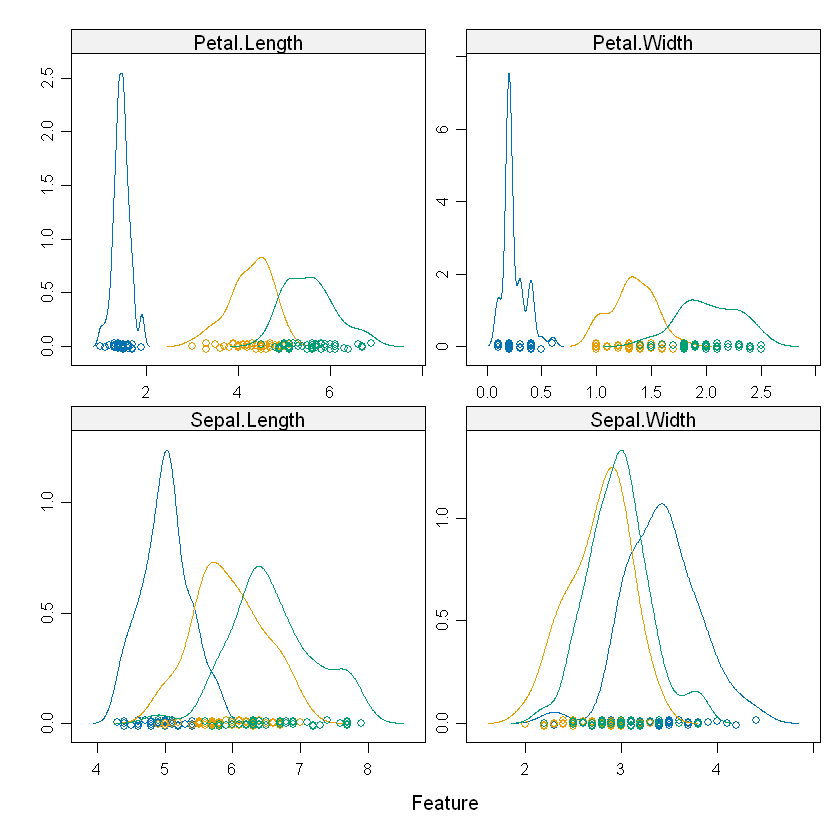

In [19]:
# Density plots of features by Species
featurePlot(
  x = iris[, 1:4],   # predictor variables
  y = iris$Species,  # target classes
  plot = "density",
  scales = list(x = list(relation = "free"), 
                y = list(relation = "free"))
)

### Decision Tree Classifier 

A Decision Tree is a non-linear classification algorithm that splits the data into smaller subsets using rules based on feature values.

At each node, the algorithm picks the best feature and threshold to split the data (using measures like Gini index or Information Gain).

Splitting continues until a stopping condition is reached (e.g., max depth, minimum samples per leaf).

The final leaf nodes represent the predicted class.

**Advantage:**
Easy to interpret, visualizable, and handles non-linear relationships.

**Limitation:**
Can overfit if not pruned.

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying E:\R-4.5.1\library\00LOCK\rpart\libs\x64\rpart.dll to E:\R-4.5.1\library\rpart\libs\x64\rpart.dll: Permission denied"
Warning message:
"restored 'rpart'"



The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpS8WOHw\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpS8WOHw\downloaded_packages
CART 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 84, 84, 84, 84, 84 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9428571  0.9142857
  0.05555556  0.9428571  0.9142857
  0.11111111  0.9428571  0.9142857
  0.16666667  0.9428571  0.9142857
  0.22222222  0.9428571  0.9142857
  0.27777778  0.9428571  0.9142857
  0.33333333  0.9428571  0.9142857
  0.38888889  0.9428571  0.9142857
  0.44444444  0.9428571  0.9142857
  0.50000000  0.3333333  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used f

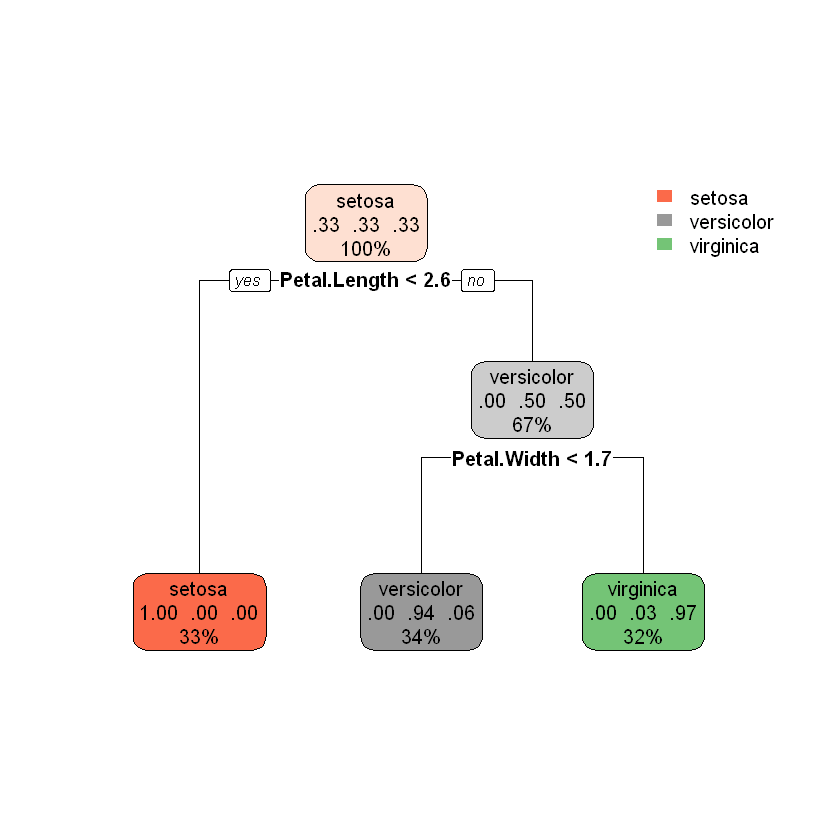

In [13]:
# Install packages if not already installed
# install.packages("caret")
install.packages("rpart")
install.packages("rpart.plot")

library(caret)
library(rpart)
library(rpart.plot)

# Load dataset
data(iris)

# Train/test split
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
trainData <- iris[trainIndex, ]
testData  <- iris[-trainIndex, ]

# Train Decision Tree model
tree_model <- train(
  Species ~ ., 
  data = trainData,
  method = "rpart",   # CART Decision Tree
  trControl = trainControl(method = "cv", number = 5),
  tuneLength = 10
)

# Print model details
print(tree_model)

# Make predictions
predictions <- predict(tree_model, testData)

# Confusion matrix
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)

# Plot the tree
rpart.plot(tree_model$finalModel)


### Random Forest Classifier 

A Random Forest is an ensemble method that builds multiple decision trees and combines them for better accuracy and stability.

Each tree is trained on a bootstrap sample (random subset of training data).

At each split, it chooses the best split among a random subset of features.

Final prediction is based on:

Majority vote (for classification).

Average (for regression).

**Advantages:**

1. Handles non-linear relationships.

2. Resistant to overfitting (compared to a single tree).

3. Works well on high-dimensional data.

**Disadvantages:**

1. Less interpretable than a single decision tree.

2. Can be slower on very large datasets.

package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying E:\R-4.5.1\library\00LOCK\randomForest\libs\x64\randomForest.dll to E:\R-4.5.1\library\randomForest\libs\x64\randomForest.dll: Permission denied"
Warning message:
"restored 'randomForest'"



The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpS8WOHw\downloaded_packages


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




note: only 3 unique complexity parameters in default grid. Truncating the grid to 3 .

Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 84, 84, 84, 84, 84 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa    
  2     0.952381  0.9285714
  3     0.952381  0.9285714
  4     0.952381  0.9285714

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-

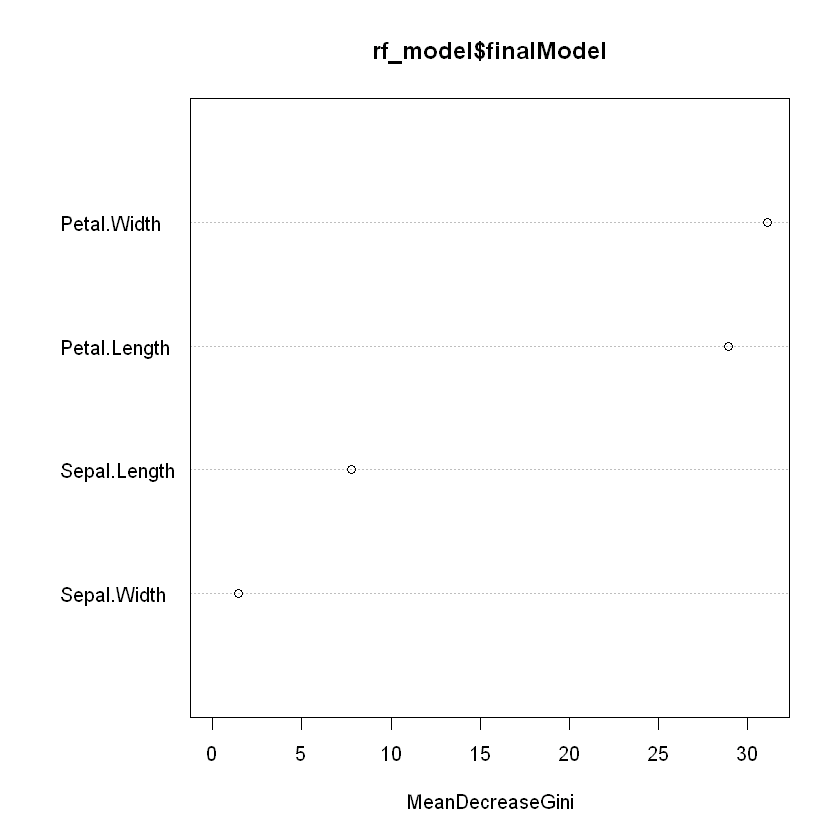

In [14]:
# Install if needed
# install.packages("caret")
install.packages("randomForest")

library(caret)
library(randomForest)

# Load dataset
data(iris)

# Train/test split
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
trainData <- iris[trainIndex, ]
testData  <- iris[-trainIndex, ]

# Train Random Forest model
rf_model <- train(
  Species ~ ., 
  data = trainData,
  method = "rf",   # Random Forest
  trControl = trainControl(method = "cv", number = 5),
  tuneLength = 5   # tries different mtry values (features at split)
)

# Print model details
print(rf_model)

# Make predictions
predictions <- predict(rf_model, testData)

# Confusion matrix
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)

# Variable importance plot
varImpPlot(rf_model$finalModel)


## Summary

| Algorithm                     | Key Idea                                                                            | caret `method` | Example Visualization                                              |
| ----------------------------- | ----------------------------------------------------------------------------------- | -------------- | ------------------------------------------------------------------ |
| **K-Nearest Neighbors (KNN)** | Classifies a point based on the majority class of its *k* nearest neighbors.        | `"knn"`        | Scatterplots with ellipses (`featurePlot`), Decision boundaries    |
| **Naive Bayes (NB)**          | Probabilistic model assuming feature independence given class. Uses Bayes’ theorem. | `"nb"`         | Density plots (`featurePlot(plot="density")`), Decision boundaries |
| **Decision Tree**             | Splits data into branches using feature thresholds until leaves represent classes.  | `"rpart"`      | Tree plots (`rpart.plot`), feature importance                      |
| **Random Forest**             | Ensemble of many decision trees with bootstrap sampling + random feature splits.    | `"rf"`         | Feature importance plots (`varImpPlot`), partial dependence plots  |
